In [1]:
# Program04.ipynb
# Caleb Roge
# Kody Bond

In [2]:
# Load the data into the Pandas dataframe
import pandas as pd

In [3]:
pd.set_option('precision', 4)

In [4]:
esports_df = pd.read_csv('esports_salaries_new.csv')
esports_df.shape

(744, 6)

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
sns.set_style('whitegrid')

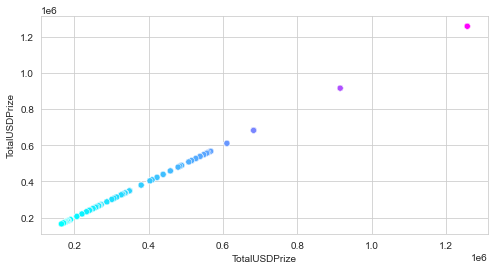

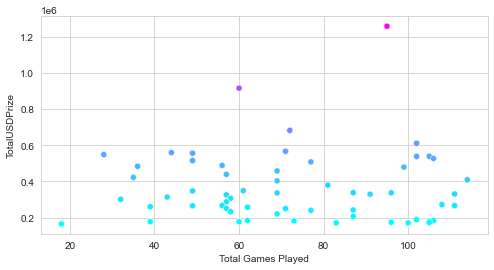

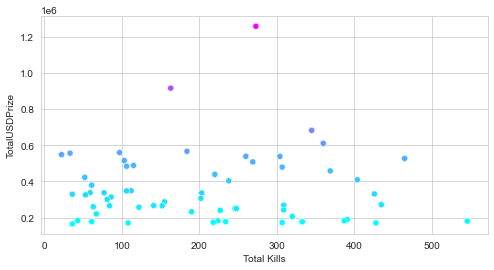

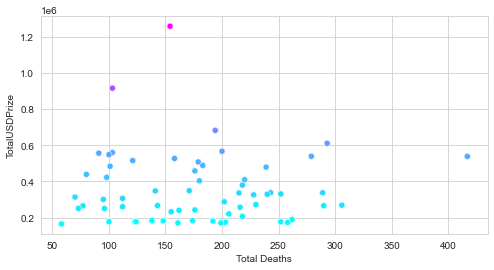

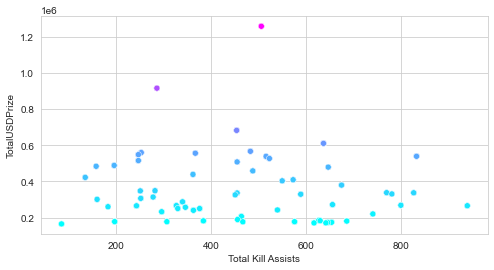

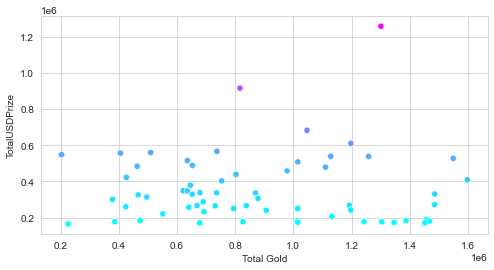

In [8]:
for feature in esports_df.columns:
    plt.figure(figsize=(8,4))
    sns.scatterplot(data=esports_df, x=feature, y='TotalUSDPrize',
                    hue='TotalUSDPrize', palette='cool', legend=False)

In [9]:
# split the data for training and testing
from sklearn.model_selection import train_test_split

In [10]:
X = esports_df.drop(columns=['TotalUSDPrize'])
y = esports_df['TotalUSDPrize']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7) 

In [12]:
X_train.shape

(558, 5)

In [13]:
X_test.shape

(186, 5)

In [14]:
# Training the model
from sklearn.linear_model import LinearRegression

In [15]:
linear_regression = LinearRegression()

In [16]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [17]:
for i, name in enumerate(esports_df.columns):
    if i < len(esports_df.columns) - 1:
        print(f"{name}: {linear_regression.coef_[i]}")

TotalUSDPrize: -5068.555831690159
Total Games Played: -885.0043283065856
Total Kills: 259.3102578324236
Total Deaths: 47.39024689798124
Total Kill Assists: 0.583378128785057


In [18]:
# Test the model

In [19]:
predicted = linear_regression.predict(X_test)

In [20]:
expected = y_test

In [21]:
predicted[:5]

array([337956.87516708, 410405.78454263, 302828.13382347, 412471.49809468,
       333565.98533516])

In [22]:
expected[:5]

732    182877.42
457    347699.25
375    610445.70
244    173098.69
192    556087.84
Name: TotalUSDPrize, dtype: float64

In [23]:
# Regression Model Metrics
from sklearn import metrics

In [24]:
metrics.r2_score(expected, predicted)

0.019602650990036774

In [25]:
metrics.mean_squared_error(expected, predicted)

35627520854.34391

In [62]:
# Choosing the best model
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [63]:
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor()
}

In [64]:
from sklearn.model_selection import KFold, cross_val_score

In [66]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, X=X, y=y, cv=kfold, scoring='r2')
    print(f"{estimator_name:>16}: mean of r2 scores = {abs(scores.mean()):.3f}")

LinearRegression: mean of r2 scores = 0.027
      ElasticNet: mean of r2 scores = 0.026
             SVR: mean of r2 scores = 0.070
KNeighborsRegressor: mean of r2 scores = 1.000
GradientBoostingRegressor: mean of r2 scores = 0.991
